In [54]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()

import os

In [55]:
#Reading all csv file names from local system

l = os.listdir("D:/Datasets/archive/Technology Companies")
li=[x.split('.')[0] for x in l]
li=sorted(li)
li_test = list(filter(None, li))

l = os.listdir("D:/Datasets/archive/Indices")
li1=[x.split('.')[0] for x in l]
li1=sorted(li1)
li_test1 = list(filter(None, li1))

In [56]:
#loading tech stock data in a single data frame
finaldf = {}
os.chdir("D:/Datasets/archive/Technology Companies")
dfs=[pd.read_csv(f, index_col=[0], parse_dates=[0])
    for f in os.listdir(os.getcwd()) if f.endswith('csv')]

finaldf = pd.concat(dfs, axis=1, join='outer', keys=li).sort_index()

In [57]:
finalindex = {}

os.chdir("D:/Datasets/archive/Indices")
dfs1=[pd.read_csv(f, index_col=[0], parse_dates=[0])
    for f in os.listdir(os.getcwd()) if f.endswith('csv')]

finalindex = pd.concat(dfs, axis=1, join='outer', keys=li1).sort_index()

In [58]:
#loading tech company names and sectors csv files
list_syp = pd.read_csv(r"D:/Datasets/archive/List of SP 500 companies.csv")
technology_list = pd.read_csv(r"D:/Datasets/archive/Technology Sector List.csv")

In [59]:
#changing column names of finaldf and finalindex
finaldf.columns.names = ['Stock Ticker','Stock Info']
finalindex.columns.names = ['Stock Ticker','Stock Info']

In [60]:
finaldf

Stock Ticker        AAPL                                                   \
Stock Info          High         Low        Open       Close       Volume   
Date                                                                        
2006-01-03      2.669643    2.580357    2.585000    2.669643  807234400.0   
2006-01-04      2.713571    2.660714    2.683214    2.677500  619603600.0   
2006-01-05      2.675000    2.633929    2.672500    2.656429  449422400.0   
2006-01-06      2.739286    2.662500    2.687500    2.725000  704457600.0   
2006-01-09      2.757143    2.705000    2.740357    2.716071  675040800.0   
...                  ...         ...         ...         ...          ...   
2020-11-16    120.989998  118.150002  118.919998  120.300003   91183000.0   
2020-11-17    120.669998  118.959999  119.550003  119.389999   74271000.0   
2020-11-18    119.820000  118.000000  118.610001  118.029999   76322100.0   
2020-11-19    119.059998  116.809998  117.589996  118.639999   74113000.0   
2020-11-20    118.769997  117.290001  118.639999  117.339996   73391400.0   

Stock Ticker                     ACN                                      ...  \
Stock Info     Adj Close        High         Low        Open       Close  ...   
Date                                                                      ...   
2006-01-03      2.284267   29.500000   28.820000   28.840000   29.299999  ...   
2006-01-04      2.290990   29.459999   29.049999   29.379999   29.459999  ...   
2006-01-05      2.272961   29.820000   29.340000   29.480000   29.680000  ...   
2006-01-06      2.331634   31.360001   29.900000   31.000000   31.150000  ...   
2006-01-09      2.323994   31.150000   30.750000   30.799999   31.059999  ...   
...                  ...         ...         ...         ...         ...  ...   
2020-11-16    120.300003  246.690002  242.639999  243.880005  244.949997  ...   
2020-11-17    119.389999  245.490005  241.279999  243.369995  243.820007  ...   
2020-11-18    118.029999  243.820007  239.550003  243.360001  239.729996  ...   
2020-11-19    118.639999  243.470001  238.690002  241.509995  243.199997  ...   
2020-11-20    117.339996  246.000000  242.259995  243.949997  243.440002  ...   

Stock Ticker         ZI                                           ZS  \
Stock Info         Open      Close     Volume  Adj Close        High   
Date                                                                   
2006-01-03          NaN        NaN        NaN        NaN         NaN   
2006-01-04          NaN        NaN        NaN        NaN         NaN   
2006-01-05          NaN        NaN        NaN        NaN         NaN   
2006-01-06          NaN        NaN        NaN        NaN         NaN   
2006-01-09          NaN        NaN        NaN        NaN         NaN   
...                 ...        ...        ...        ...         ...   
2020-11-16    41.290001  41.610001   911700.0  41.610001  134.169998   
2020-11-17    41.130001  40.750000   859300.0  40.750000  137.850006   
2020-11-18    40.500000  39.590000  1454600.0  39.590000  139.000000   
2020-11-19    40.779999  42.680000  2112000.0  42.680000  141.500000   
2020-11-20    43.340000  43.590000  1759200.0  43.590000  144.960007   

Stock Ticker                                                             
Stock Info           Low        Open       Close     Volume   Adj Close  
Date                                                                     
2006-01-03           NaN         NaN         NaN        NaN         NaN  
2006-01-04           NaN         NaN         NaN        NaN         NaN  
2006-01-05           NaN         NaN         NaN        NaN         NaN  
2006-01-06           NaN         NaN         NaN        NaN         NaN  
2006-01-09           NaN         NaN         NaN        NaN         NaN  
...                  ...         ...         ...        ...         ...  
2020-11-16    127.000000  128.990005  133.520004  2650800.0  133.520004  
2020-11-17    132.500000  135.080002 

In [61]:
finalindex

Stock Ticker         DJI                                                   \
Stock Info          High         Low        Open       Close       Volume   
Date                                                                        
2006-01-03      2.669643    2.580357    2.585000    2.669643  807234400.0   
2006-01-04      2.713571    2.660714    2.683214    2.677500  619603600.0   
2006-01-05      2.675000    2.633929    2.672500    2.656429  449422400.0   
2006-01-06      2.739286    2.662500    2.687500    2.725000  704457600.0   
2006-01-09      2.757143    2.705000    2.740357    2.716071  675040800.0   
...                  ...         ...         ...         ...          ...   
2020-11-16    120.989998  118.150002  118.919998  120.300003   91183000.0   
2020-11-17    120.669998  118.959999  119.550003  119.389999   74271000.0   
2020-11-18    119.820000  118.000000  118.610001  118.029999   76322100.0   
2020-11-19    119.059998  116.809998  117.589996  118.639999   74113000.0   
2020-11-20    118.769997  117.290001  118.639999  117.339996   73391400.0   

Stock Ticker                    GSPC                                      ...  \
Stock Info     Adj Close        High         Low        Open       Close  ...   
Date                                                                      ...   
2006-01-03      2.284267   29.500000   28.820000   28.840000   29.299999  ...   
2006-01-04      2.290990   29.459999   29.049999   29.379999   29.459999  ...   
2006-01-05      2.272961   29.820000   29.340000   29.480000   29.680000  ...   
2006-01-06      2.331634   31.360001   29.900000   31.000000   31.150000  ...   
2006-01-09      2.323994   31.150000   30.750000   30.799999   31.059999  ...   
...                  ...         ...         ...         ...         ...  ...   
2020-11-16    120.300003  246.690002  242.639999  243.880005  244.949997  ...   
2020-11-17    119.389999  245.490005  241.279999  243.369995  243.820007  ...   
2020-11-18    118.029999  243.820007  239.550003  243.360001  239.729996  ...   
2020-11-19    118.639999  243.470001  238.690002  241.509995  243.199997  ...   
2020-11-20    117.339996  246.000000  242.259995  243.949997  243.440002  ...   

Stock Ticker           W                                            XLK  \
Stock Info          Open       Close     Volume   Adj Close        High   
Date                                                                      
2006-01-03     36.130001   36.700001  3575900.0   25.052456   43.180000   
2006-01-04     36.549999   37.040001  3351800.0   25.284552   43.000000   
2006-01-05     37.160000   38.220001  4014300.0   26.090050   42.660000   
2006-01-06     38.619999   38.369999  3247000.0   26.192448   44.430000   
2006-01-09     38.389999   38.910000  3102200.0   26.561066   44.750000   
...                  ...         ...        ...         ...         ...   
2020-11-16    137.779999  138.009995  3433200.0  138.009995  251.559998   
2020-11-17    136.990005  135.869995  2978000.0  135.869995  253.669998   
2020-11-18    135.949997  133.229996  2359100.0  133.229996  255.130005   
2020-11-19    131.660004  136.169998  2473900.0  136.169998  259.660004   
2020-11-20    136.619995  134.880005  2295000.0  134.880005  260.600006   

Stock Ticker                                                           
Stock Info           Low        Open       Close   Volume   Adj Close  
Date                                                                   
2006-01-03     42.009998   42.970001   42.750000  3117300   42.750000  
2006-01-04     41.910000   42.990002   42.520000  3193100   42.520000  
2006-01-05     41.560001   42.660000   41.869999  3285600   41.869999  
2006-01-06     41.860001   41.950001   44.290001  3842600   44.290001  
2006-01-09     43.580002   44.099998   43.639999  2111900   43.639999  
...                  ...         ...         ...      ...         ...  
2020-11-16    246.860001  249.369995  248.789993  1087500  248.789993  
2020-11-17    2

exploratory data analysis (EDA)

In [62]:
##Sunburst chart
fig = px.sunburst(list_syp, path=['Sector','Symbol'], height=1000)
fig.update_layout(title={
    'text': "Companies per Sector",
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    showlegend=False)
fig.show()

In [63]:
#count of each sector
sectors = pd.DataFrame((list_syp['Sector'].value_counts() / list_syp['Sector'].count())*100)
print(sectors)

                           Sector
Industrials             14.455446
Information Technology  14.059406
Financials              13.069307
Health Care             12.277228
Consumer Discretionary  12.079208
Consumer Staples         6.534653
Real Estate              6.138614
Utilities                5.544554
Materials                5.544554
Energy                   5.148515
Communication Services   5.148515


Market Capitalization is the total value of a company’s shares outstanding at a given moment in time.
Top 5 industry sectors are, Industrial, Information Technology, Financials, Health Care, Consumer Discretionary

In [64]:
#Pie chart to analyse market capitalization by each company and top 5 companies
fig = go.Figure()
fig.add_trace(go.Pie(values=technology_list['Market Cap (Billions)'],labels=technology_list['Symbol'], hole=.05,pull=[0.1, 0, 0, 0, 0]))
fig.update_traces(textposition='inside')
fig.update_layout(height=800)
fig.show()

From above sunburst chart, it is evident that Apple had the highest market capitalization covering 20.5%
Microsoft is at second position with market capitalization of 16.8%

In [65]:
#bar chart for PE ratio per company of top 5 tech stocks
order_PE_ratio = technology_list[['Symbol', 'PE Ratio', 'Name']].sort_values('PE Ratio', ascending=False).head(5)

figure = px.bar(order_PE_ratio, y=order_PE_ratio['Symbol'], x=order_PE_ratio['PE Ratio'], color='Name', 
                title='PE Ratio per Company of Top 5 Companies')
figure.show()



P.E. Ratio talks about Company's share price to the company's earnings per share.
It evaluates whether the stocks are overvalued or undervalued.
Top 5 Companies with highest P.E. Ratio are: Fortive Corporation, Shopify, StoneCo, Suare Inc, Autodsk Inc.


In [66]:
#Table: top 10 company volume
volume_order = technology_list[['Name', 'Volume', 'Symbol']].sort_values('Volume', ascending=False).head(5)
volume_order.style.background_gradient()

,Name,Volume,Symbol
0,Apple Inc.,127959000,AAPL
40,Palantir Technologies Inc.,83806000,PLTR
18,Advanced Micro Devices Inc.,46505000,AMD
6,Intel Corporation,30126000,INTC
1,Microsoft Corporation,25684000,MSFT


In [67]:
#returns = {}

l = os.listdir("D:/Datasets/archive/Technology Companies")
li2=[x.split('.')[0] for x in l]
li2=sorted(li)
li_test = list(filter(None, li2))

#daily returns
for tick in li_test:
    returns[tick] = finaldf[tick]['Adj Close'].pct_change()

KeyError: 'finaldf'

Volume is the no of shares that shared hands during the day.
From above table, Apple, Palantir Technologies, Advanced Micro Devices Inc, Intel and Microsoft has the highest volume

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}, xlabel='Stock Ticker', ylabel='Stock Ticker'>

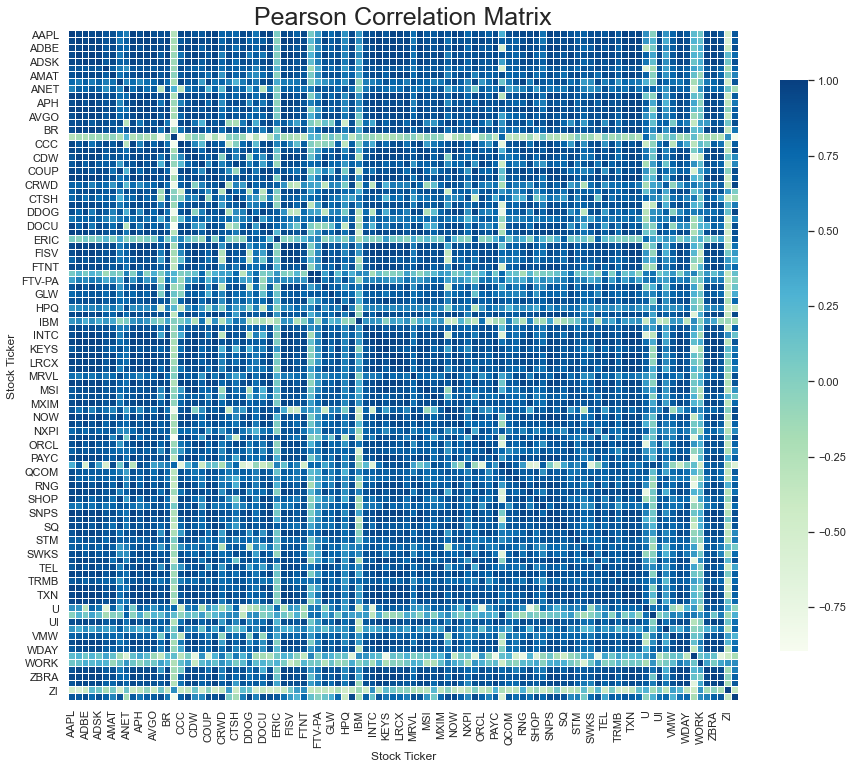

In [68]:
#Stocks Pearson Correlation Matrix

sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(finaldf.xs(key='Adj Close', axis=1, level='Stock Info').corr(),linewidths=0.1,
            square=True,cmap="GnBu",linecolor='w', annot=False, cbar_kws={"shrink": .7})


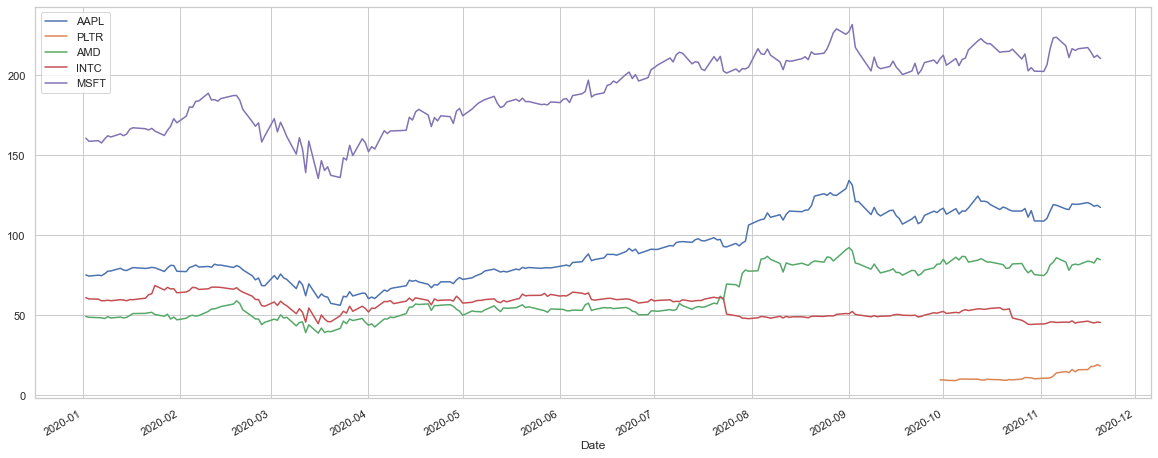

In [69]:
#analyse close stock price of top 5 companies with max volume for the year 2020
for tick in volume_order['Symbol']:
    finaldf[tick].loc['2020-01-01':'2020-12-31']['Close'].plot(figsize=(20,8),label=tick)
plt.legend()

The correlation coefficient can range in value from −1 to +1. 
The larger the absolute value of the coefficient, the stronger the relationship between the variables. 
For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. 
A correlation close to 0 indicates no linear relationship between the variables.
The sign of the coefficient indicates the direction of the relationship. 
If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents 
the correlation slopes upward. If one variable tends to increase as the other decreases, 
the coefficient is negative, and the line that represents the correlation slopes downward.

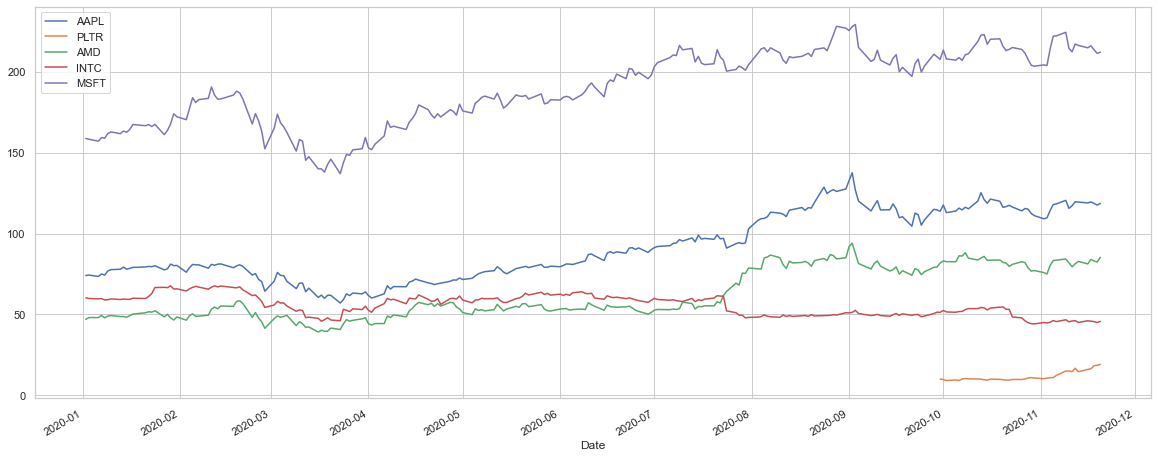

In [70]:
#based on above result, analyse open stock price of above 5 companies for the year 2020
for tick in volume_order['Symbol']:
    finaldf[tick].loc['2020-01-01':'2020-12-31']['Open'].plot(figsize=(20,8),label=tick)
plt.legend()

In [71]:
#stock volatility of cognizant
df_sv = (finaldf['CTSH']['Close']/finaldf['CTSH']['Close'].shift(1))-1

fig = px.histogram(df_sv, x = "Close")

fig.update_layout(
    plot_bgcolor = "white",
    title_text="Stock Volatility of Cognizant"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black",
                title_text="<b>Value</b>")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black", 
                 title_text="<b>Return</b>")
iplot(fig)

In [73]:
#Compute and interpret the sample correlation coefficient
import numpy as np
my_rho = np.corrcoef(finaldf['ORCL'].loc['2020-01-01':'2020-12-31']['Adj Close'], finaldf['DELL'].loc['2020-01-01':'2020-12-31']['Adj Close'])
my_rho

array([[1.        , 0.89174182],
       [0.89174182, 1.        ]])

The moderately positive correlation shows that the adjusted Close stock prices of Oracle and Dell tend to move together. That is, when the adjusted stock price of Oracle increases, so does the adjusted stock price of Dell. 

Because the adjusted stock prices for these two companies tend to increase and decrease together, holding only Oracle and Dell stock in a portfolio could lead to a lot of volatility in the value of the portfolio. To minimize volatility, a financial analyst will often recommend acquiring at least some stocks that have negatively correlated adjusted prices.

In [74]:
#Compute and interpret the sample covariance
import numpy as np
my_rho = np.cov(finaldf['ORCL'].loc['2020-01-01':'2020-12-31']['Adj Close'], finaldf['DELL'].loc['2020-01-01':'2020-12-31']['Adj Close'])
my_rho

array([[ 14.00924955,  35.56979688],
       [ 35.56979688, 113.57156989]])

A positive covariance shows a positive relationship between the stock prices; According to the value, i.e., 35.56, there's a positive correlation between stock prices of Oracle and Dell.

In [30]:
#FINANCIAL CHARTS

Following is the lineplot of how Apple, Palantir, AMD and Intel performed in terms of number of shares that exchanged hands during covid time, i.e. in the year 2020

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Daily Trading volume'),
 Text(0.5, 1.0, 'Intel')]

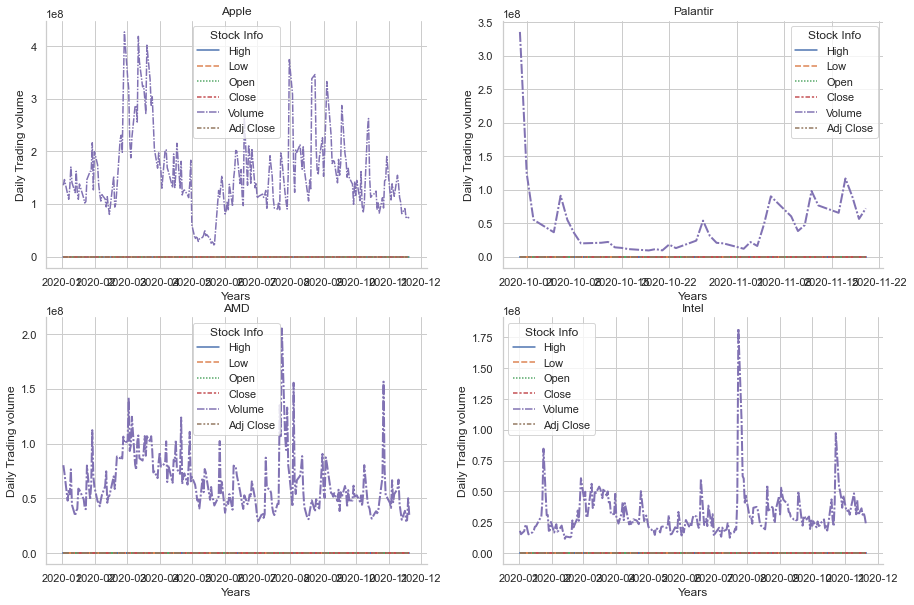

In [31]:
sns.set(style="whitegrid", font_scale=1)
fig, axes = plt.subplots(2, 2,figsize=(15,10))
#fig.set_xticklabels(rotation = 45)
# Yearly Returns
sns.lineplot(data=finaldf.loc['2020-01-01':'2020-12-31']['AAPL'], color='green', ax=axes[0,0])
sns.lineplot(data=finaldf.loc['2020-01-01':'2020-12-31']['PLTR'], color='blue', lw=2, ax=axes[0,1])
sns.lineplot(data=finaldf.loc['2020-01-01':'2020-12-31']['AMD'], color='yellow', lw=2, ax=axes[1,0])
sns.lineplot(data=finaldf.loc['2020-01-01':'2020-12-31']['INTC'], color='purple', lw=2, ax=axes[1,1])

#sns.set_xticklabels(rotation = 45)
sns.despine()

axes[0,0].set(xlabel='Years', ylabel='Daily Trading volume', title='Apple')
axes[0,1].set(xlabel='Years', ylabel='Daily Trading volume', title='Palantir')
axes[1,0].set(xlabel='Years', ylabel='Daily Trading volume', title='AMD')
axes[1,1].set(xlabel='Years', ylabel='Daily Trading volume', title='Intel')

In [32]:
from plotly.offline import init_notebook_mode, iplot

The following interactive chart shows how adjusted closing price of Apple performed over these past years.

In [75]:
#Line chart of Apple
finaldf['AAPL']['Adj Close'].iplot(fill=True,colors=['yellow'])

The following stacked area chart shows how adjusted closing price of Nvidia, Oracle, NXPI and Palo Alto have performed over these years

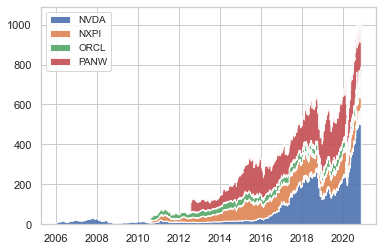

In [34]:
#Stacked area chart
plt.stackplot(finaldf.index,
              [finaldf['NVDA']['Adj Close'], finaldf['NXPI']['Adj Close'],
               finaldf['ORCL']['Adj Close'], finaldf['PANW']['Adj Close']],
              labels=['NVDA', 'NXPI', 'ORCL', 'PANW'],
              alpha=0.9)

plt.legend(loc=2, fontsize='small')
plt.show()

A Simple Moving Average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. Is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend.
The following chart shows the above mentioned trend of Oracle Stock Prices


In [76]:
#Simple Moving Averages - Oracle Stock Price
finaldf['ORCL'].loc['2020-01-01':'2020-12-31']['Adj Close'].ta_plot(study='sma', periods=[13,21,55])

The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.
The following is a candlestick chart for AMD

In [77]:
# AMD Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=finaldf['AMD'].index,
                open=finaldf['AMD']['Open'],
                high=finaldf['AMD']['High'],
                low=finaldf['AMD']['Low'], 
                close=finaldf['AMD']['Close'])
                ])

fig.update_layout(
    title='AMD Stock Price',
    yaxis_title='AMD Stock'
)

fig.show()

A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.
When the bands tighten during a period of low volatility, it raises the likelihood of a sharp price move in either direction.
When the bands separate by an unusual large amount, volatility increases and any existing trend may be ending.
Prices have a tendency to bounce within the bands' envelope, touching one band then moving to the other band. You can use these swings to help identify potential profit targets.
Following is a Bollinger Band for Microsoft

In [78]:
finaldf['MSFT'].loc['2020-01-01':'2020-12-31']['Adj Close'].ta_plot(study='boll')